# Load modules

In [1]:
import numpy as np
import pandas as pd
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
from pipedream_solver.nutils import interpolate_sample

import matplotlib.pyplot as plt
import seaborn as sns

import influxdb 
import pandas as pd
from dateutil import tz

# import the libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

import pandas as pd
import numpy as np
from pipedream_solver.hydraulics import SuperLink
from pipedream_solver.simulation import Simulation
import ast
import pandas as pd
import seaborn as sns
sns.set_palette('husl')



# Load pipedream model information 

In [2]:
superjunctions = pd.read_csv('../data/waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('../data/waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_excel('../data/Waller_HMS_model_data.xlsx', sheet_name=0)

In [3]:
superlinks

,name,id.1,sj_0,sj_1,in_offset,out_offset,dx,n,shape,g1,g2,g3,g4,Q_0,h_0,ctrl,A_s,A_c,C
id,,,,,,,,,,,,,,,,,,,
0,R_WLR01,0,30,0,0.0,0.0,238.658400,0.040,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
1,R_WLR02,1,0,1,0.0,0.0,564.184800,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
2,R_WLR04,2,2,3,0.0,0.0,580.034400,0.060,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
3,R_WLR03,3,1,3,0.0,0.0,832.917868,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
4,R_WLR05,4,3,4,0.0,0.0,631.305780,0.050,Trapezoidal,3.0480,4.5720,1.874766,0.0,0.0,0.00001,False,1.0,0.0,0.0
5,R_WLR06,5,4,5,0.0,0.0,446.966267,0.050,Trapezoidal,2.4384,4.5720,2.099738,0.0,0.0,0.00001,False,1.0,0.0,0.0
6,R_WLR07,6,5,6,0.0,0.0,526.072766,0.050,Trapezoidal,2.4384,5.4864,2.386065,0.0,0.0,0.00001,False,1.0,0.0,0.0
7,R_HEM04,7,24,25,0.0,0.0,528.828000,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0
8,R_HEM02,8,28,23,0.0,0.0,430.682400,0.015,Trapezoidal,2.4384,5.4864,4.374453,0.0,0.0,0.00001,False,1.0,0.0,0.0


# Specify simulation parameters

# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[21, ['g2', 'g3']] = 0., 7.777146367746631
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.

# Manual edits to hydrology params
lag_time_adjust_ratio = 0.4
CN_adjust_ratio = 1.0

# Simulation params
sample_interval = 30
node_ids = ['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Define runoff functions

In [4]:
superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [5]:
from hydrology import scs_composite_CN, scs_excess_precipitation, scs_uh_runoff, precip_data, scs_excess_precipitation

# Load LCRA flow, depth, and precipitation data

In [6]:
# Add LCRA data (Flow, depth, and precipitation data for the 'Waller Creek at 23rd Street' gage from the LCRA site.)
LCRA_2022 = pd.read_excel('../data/LCRA_Export/LCRA_Export_2022.xlsx')
LCRA_2023 = pd.read_excel('../data/LCRA_Export/LCRA_Export_2023.xlsx')
LCRA=pd.concat([LCRA_2022[8:],LCRA_2023[8:]])
LCRA = LCRA.set_index('Site Name')
LCRA.index.name = 'Time'
# Handle timezone
LCRA = LCRA.tz_localize('US/Central', nonexistent='shift_forward').tz_convert('UTC')
# Rename columns to be more descriptive
LCRA = LCRA.rename(columns={'W3A' : 'depth__ft', 'W3A.1' : 'flow_rate__cfs', 'W3A.3' : 'precip_tot__in'})
LCRA = LCRA.drop('W3A.2', axis=1)
# Filter dataset to time period


# Load ultrasonic sensor data

In [7]:
# Visualizing the actual depth of Waller Creeks  

# set up the lists(node_id and length between node and bottom)
node_id_list=['Bridge1','Bridge2','Bridge3','Bridge4','Bridge5']
length_ntb_list =[3911.6, 3175, 4927.6, 4978.4, 3556]
ntb_df=pd.DataFrame(length_ntb_list, columns=['depth'])
ntb_df=ntb_df.set_index([node_id_list])

#set up the influxDBClient 
client_dict = {'host' : 'ec2-3-91-156-8.compute-1.amazonaws.com',
               'port' : 8086,
               'username' : 'generic_node',
               'password' : 'GlareShellTwilight',
               'database' : 'RAW'}

# Compute runoff into each superjunction

In [8]:
# Compute runoff into each superjunction
def Model_initialization(precip__in,subbasins,P_now,decay_function=lambda x: 0.):
    keepGoing=True
    while keepGoing:
        try:
            Q_in = {}
            CNs = []
            # Manual edits to hydrology params
            lag_time_adjust_ratio = 1.0
            CN_adjust_ratio = 1.0


            # For each subbasin...
            for i in range(len(subbasins)):
                P_now = 0.
                # Load subbasin parameters
                CN_C = subbasins['Curve Number'][i]
                A_Imp = subbasins['Impervious Percent'][i]
                area__sq_mi = subbasins['Area (mi2)'][i]
                downstream = subbasins['Downstream'][i]
                lag_time__min = subbasins['Lag Time'][i] * lag_time_adjust_ratio

                # Compute composite curve number
                CN = scs_composite_CN(CN_C, A_Imp) * CN_adjust_ratio
                CN = min(CN, 98)

                # Compute excess precipitation
                excess_precip_cum__in, excess_precip__in, P_now = scs_excess_precipitation(precip__in, CN,P_now,decay_function=decay_function)

                # Compute runoff using unit hydrograph
                runoff__cms = scs_uh_runoff(excess_precip__in, uh__dimless, area__sq_mi, sample_interval,lag_time__min)
                Q_in[downstream] = runoff__cms

            # Format flow input as DataFrame
            Q_in = pd.DataFrame.from_dict(Q_in)
            # Add flow input for missing sites
            Q_in['UPSTREAM_WALLER'] = Q_in['R_WLR01']
            Q_in['UPSTREAM_HEMPHILL'] = Q_in['R_HEM01']
            Q_in[[name for name in superjunctions['name'] if not name in Q_in.columns]] = 0.
            # Ensure flow input is only for superjunctions specified in table
            Q_in = Q_in[superjunctions['name'].tolist()]
            # Remove NaN values
            Q_in = Q_in.fillna(0.)
            # Copy flow input with original timestamps
            Q_in_orig = Q_in.copy()
            # Convert flow input index to integer index starting with zero
            Q_in.index = Q_in.index.astype(int) / 1e9
            Q_in.index -= Q_in.index.min()
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True


    return excess_precip__in,Q_in,P_now

In [9]:
# Run simulation without KF
def Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,load_data):
    keepGoing=True
    while keepGoing:
        try:


            superlink = SuperLink(superlinks, superjunctions,internal_links=30, mobile_elements=True)
            

            H_j = []
            h_Ik = []
            Q_uk = []
            Q_dk = []

            # Set constant timestep (in seconds)

            # Add constant baseflow
            baseflow = 0.22e-3  * np.ones(superlink._h_Ik.size)

            # Create simulation context manager
            with Simulation(superlink, Q_in=Q_in) as simulation:
                simulation.model.load_state(load_data)
                # While simulation time has not expired...
                while simulation.t <= simulation.t_end:
                    # Step model forward in time
                    simulation.step(dt=dt, num_iter=8, Q_Ik=baseflow)
                    simulation.model.reposition_junctions()
                    # Print progress bar
                    simulation.print_progress()
                    # Save states
                    H_j.append(simulation.model.H_j.copy())
                    h_Ik.append(simulation.model.h_Ik.copy())
                    Q_uk.append(simulation.model.Q_uk.copy())
                    Q_dk.append(simulation.model.Q_dk.copy())

            time_index = pd.date_range(start=excess_precip__in.index.min(), 
                                       periods=len(H_j), 
                                       freq=f'{dt}s')

            # Convert saved states to dataframes
            H_j = pd.DataFrame(np.vstack(H_j), index=time_index, columns=superjunctions['name'])
            h_Ik = pd.DataFrame(np.vstack(h_Ik), index=time_index)
            Q_uk = pd.DataFrame(np.vstack(Q_uk), index=time_index, columns=superlinks['name'])
            Q_dk = pd.DataFrame(np.vstack(Q_dk), index=time_index, columns=superlinks['name'])

            # Compute depth
            h_j = H_j - simulation.model._z_inv_j
            final_data=simulation.model.states
            
            keepGoing=False
        
        except ValueError:
            keepGoing=True
        except KeyError :
            keepGoing=True
        except AssertionError:
            keepGoing=True

    
    return H_j,h_Ik,Q_uk,Q_dk,h_j,final_data

# Automatic figure graph

In [10]:
def save_fig_depth(file_name):
   
    fig, ax = plt.subplots(figsize=(18, 6))

    s = run_query(client, 'value', 'depth', {'node_id' : 'Bridge3'})
    x2=s[start_date:end_date]
    t_b2 =s[start_date:end_date].index
    plt.plot(t_b2,x2,'-', label='Bridge3')

    (m_per_ft * LCRA['depth__ft'][start_date:end_date]).plot(ax=ax, label='LCRA', c='r')




    h_j[site_junction_name].plot(ax=ax, label='Model', c='blue', zorder=3)


    plt.xlabel('Time', size=15)
    plt.ylabel('Depth (m)', size=15)
    plt.legend()
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_without_bridge2&4&5_depth_99985.png')
    
def save_fig_flowrate(file_name):
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(Q_uk[site_link_name], label='Model', c='b')
    (m_per_ft**3 * LCRA['flow_rate__cfs'][start_date:end_date]).plot(ax=ax, label='LCRA', c='r')
    plt.legend()
    plt.xlabel('Time', size=15)
    plt.ylabel('Flow rate (cms)', size=15)
    plt.title('Flow rate comparison', size=15)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_flow_rate_99985.png')

def save_fig_calibration(file_name):
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.scatter(m_per_ft * LCRA['depth__ft'][start_date:end_date], m_per_ft**3 * LCRA['flow_rate__cfs'][start_date:end_date], label='LCRA',color='red')
    plt.scatter(h_j[site_junction_name], Q_uk[site_link_name].values, label='Model' ,color='blue')
    plt.legend()
    plt.xlabel('Depth',size=13)
    plt.ylabel('Discharge',size=13)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_calibration_99985.png')
def save_fig_precip(file_name):
    fig, ax = plt.subplots(figsize=(18, 6))

    plt.plot(precip__in)
    plt.xlabel('Time', size=15)
    plt.ylabel('Precipitation (inch)', size=15)
    plt.title('Rain Intensity', size=15)
    #plt.savefig('/Users/future_water_system/Desktop/Data/waller-creek-model_result/continous_scs/Multi_storm/all_data/'+file_name+'_precip_99985.png')  

# Simulation 

In [11]:


## Load pipedream model information 
superjunctions = pd.read_csv('../data/waller_superjunctions.csv', index_col=0)  
superlinks = pd.read_csv('../data/waller_creek_superlinks.csv', index_col=0) 
subbasins = pd.read_csv('../data/Waller_HMS_model_data.csv', index_col=0)

superjunctions

,name,id,z_inv,h_0,bc,storage,a,b,c,max_depth
0,J_WLR01_RR_S_OF_MORROW,0,220.133601,0.00001,False,functional,0.0,0.0,100.0,inf
1,J_WLR02_LAMAR,1,215.563704,0.00001,False,functional,0.0,0.0,100.0,inf
2,J_WLR03_TRIB_AT_SWANEE,2,211.506633,0.00001,False,functional,0.0,0.0,100.0,inf
3,J_WLR05_COMB_AT_HUNTLAND,3,205.822296,0.00001,False,functional,0.0,0.0,100.0,inf
4,J_WLR06_US_POND_REILLY,4,200.366376,0.00001,False,functional,0.0,0.0,100.0,inf
5,J_WLR07_KOENIG,5,196.397880,0.00001,False,functional,0.0,0.0,100.0,inf
6,J_WLR08_NORTH_LOOP,6,192.618360,0.00001,False,functional,0.0,0.0,100.0,inf
7,J_WLR09_51ST,7,190.853568,0.00001,False,functional,0.0,0.0,100.0,inf
8,J_WLR10_INTRAMURAL_FIELDS,8,186.827160,0.00001,False,functional,0.0,0.0,100.0,inf
9,J_WLR12_COMB_AT_DUVAL,9,180.024024,0.00001,False,functional,0.0,0.0,100.0,inf


In [12]:

# Specify simulation parameters
# Unit conversions
m_per_ft = 0.3048
ft_per_mi = 5280.
in_per_ft = 12.
s_per_min = 60
ns_per_s = 1e9

# Manual edits to model
superlinks.loc[21, ['g2', 'g3']] = 0., 7.777146367746631
superlinks['C_uk'] = 0.
superlinks['C_dk'] = 0.
#superjunctions['z_inv'][14]=156.0

# Simulation params
sample_interval = 30

site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

# Load unit hydrograph
# Load dimensionless unit hydrograph
uh__dimless = pd.read_csv('../data/unit_hydrograph.csv')
# Drop unnecessary columns and rows
uh__dimless = uh__dimless[['time ratios', 'discharge ratios']].dropna()
dt = 10

In [13]:
start_date='20220627'

end_date='20230520'

final_data={}
file_name='startDate'+str(start_date)+'_endDate'+str(end_date)
print(file_name)

P_now = 0

precip__in=precip_data(LCRA, start_date, end_date)
if precip__in.empty != True:
    excess_precip__in,Q_in,P_now=Model_initialization(precip__in,subbasins,P_now,decay_function=lambda x: (1 - 0.99675)*x)
    H_j,h_Ik,Q_uk,Q_dk,h_j,final_data=Model_simulation(excess_precip__in,Q_in,dt,superlinks,superjunctions,final_data)
    final_data['t']=0
    
    #save_fig_precip(file_name)
    #save_fig_depth(file_name)
    #save_fig_flowrate(file_name)
    #save_fig_calibration(file_name)










startDate20220627_endDate20230520
[==================================================] 100.0% [638.83 s]

# Plot observed vs. modeled depth-discharge relationship

Text(0, 0.5, 'Discharge')

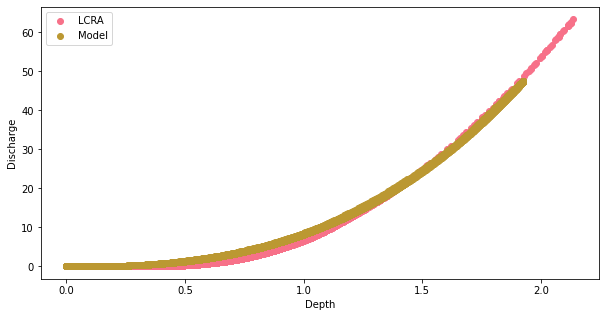

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(m_per_ft * LCRA['depth__ft'], m_per_ft**3 * LCRA['flow_rate__cfs'], label='LCRA')
plt.scatter(h_j[site_junction_name], Q_uk[site_link_name].values, label='Model')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Discharge')


In [15]:
bridge_2 = pd.read_csv('../data/bridge2_20220627-20230520.csv', index_col=0)
bridge_2.index = pd.to_datetime(bridge_2.index)
bridge_3 = pd.read_csv('../data/bridge3_20220627-20230520.csv', index_col=0)
bridge_3.index = pd.to_datetime(bridge_3.index)
bridge_4 = pd.read_csv('../data/bridge4_20220627-20230520.csv', index_col=0)
bridge_4.index = pd.to_datetime(bridge_4.index)
bridge_5 = pd.read_csv('../data/bridge5_20220627-20230520.csv', index_col=0)
bridge_5.index = pd.to_datetime(bridge_5.index)

In [16]:
site_junction_name = 'J_WLR18_COMB_HEMP'
site_link_name = 'R_WLR16'
site_junction_index = 14
site_link_index = 21

<AxesSubplot:>

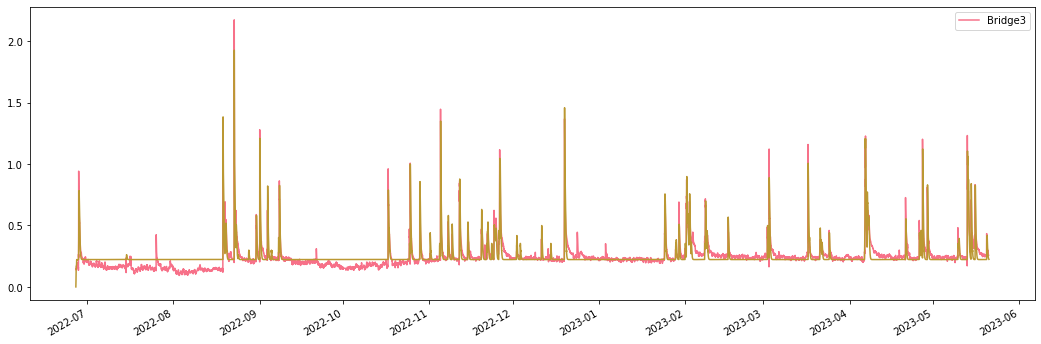

In [17]:
fig, ax = plt.subplots(figsize=(18, 6))
bridge_3.plot(ax=ax)
h_j[site_junction_name].plot(ax=ax)

(19205.0, 19266.0)

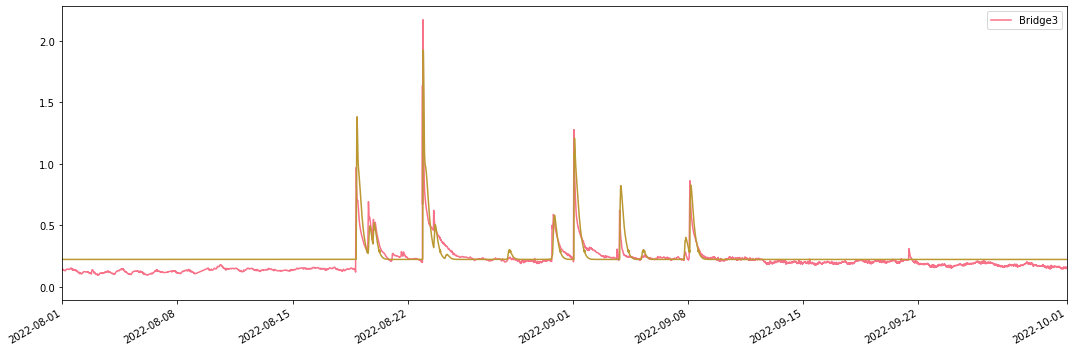

In [18]:
fig, ax = plt.subplots(figsize=(18, 6))
bridge_3.plot(ax=ax)
h_j[site_junction_name].plot(ax=ax)
plt.xlim('20220801', '20221001')

(19266.0, 19327.0)

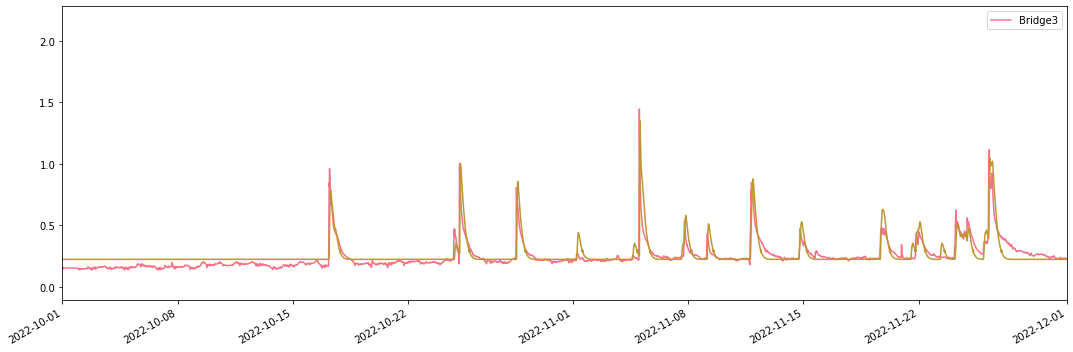

In [19]:
fig, ax = plt.subplots(figsize=(18, 6))
bridge_3.plot(ax=ax)
h_j[site_junction_name].plot(ax=ax)
plt.xlim('20221001', '20221201')

In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create an instance of RANSACRegressor
ransac = RANSACRegressor(base_estimator=LinearRegression(),
                         min_samples=30, max_trials=30,
                         loss='absolute_loss', random_state=42,
                         residual_threshold=1)

In [21]:
def RANSAC(data_sensor,data_simulation):
    from sklearn.metrics import r2_score, mean_squared_error
    y = data_sensor.reshape(-1, 1)
    X = data_simulation.reshape(-1, 1)
    #

    # Fit the model
    ransac.fit(X, y)

    # Get the Inlier mask; Create outlier mask
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)


    r2_score_inlier=r2_score(X[inlier_mask], y[inlier_mask])

    r2_score=r2_score(X, y)

    return inlier_mask, outlier_mask, r2_score_inlier, r2_score, X, y

In [22]:
def NSE(observed, modeled):
    num = ((observed - modeled)**2).sum()
    den = ((observed - observed.mean())**2).sum()
    return 1 - num / den

In [23]:
#head_1=H_j['J_WLR16_32ND']-superjunctions.z_inv[13]
#head_2=H_j['J_WLR18_COMB_HEMP']-superjunctions.z_inv[14]
#head_3=H_j['J_WLR19_23RD']-superjunctions.z_inv[15]
#head_4=H_j['J_WLR20_TRINITY']-superjunctions.z_inv[16]
#head_1=head_1+0.07
#head_3=head_3+0.08
#head_4=head_4+0.21
head_1 = h_j['J_WLR16_32ND'].resample('5min').mean()
head_2 = h_j['J_WLR18_COMB_HEMP'].resample('5min').mean()
head_3 = h_j['J_WLR19_23RD'].resample('5min').mean()
head_4 = h_j['J_WLR20_TRINITY'].resample('5min').mean()

In [24]:
sensor_1 = bridge_2.iloc[bridge_2.index.get_indexer(head_1.index, method='nearest')]['Bridge2']
sensor_2 = bridge_3.iloc[bridge_3.index.get_indexer(head_2.index, method='nearest')]['Bridge3']
sensor_3 = bridge_4.iloc[bridge_4.index.get_indexer(head_3.index, method='nearest')]['Bridge4']
sensor_4 = bridge_5.iloc[bridge_5.index.get_indexer(head_4.index, method='nearest')]['Bridge5']

0.1684691679968312 0.1684691679968312


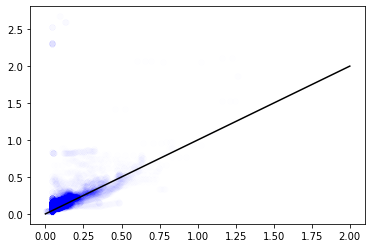

In [25]:
plt.scatter(head_1.values, sensor_1.values, alpha=0.005, c='b')
plt.plot(np.linspace(0, 2), np.linspace(0, 2), c='k')
print(NSE(sensor_1.values, head_1.values), r2_score(sensor_1.values, head_1.values))

0.5686567271453791 0.5686567271453791


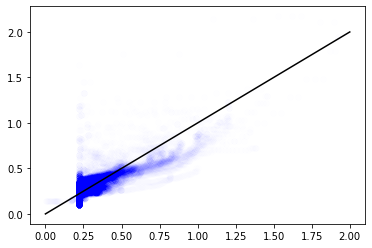

In [26]:
plt.scatter(head_2.values, sensor_2.values, alpha=0.005, c='b')
plt.plot(np.linspace(0, 2), np.linspace(0, 2), c='k')
print(NSE(sensor_2.values, head_2.values), r2_score(sensor_2.values, head_2.values))

-0.6521704554698766


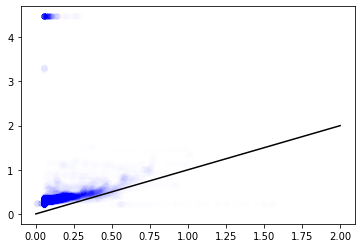

In [27]:
plt.scatter(head_3.values, sensor_3.values, alpha=0.005, c='b')
plt.plot(np.linspace(0, 2), np.linspace(0, 2), c='k')
print(NSE(sensor_3.values, head_3.values))

-0.08262183647944044


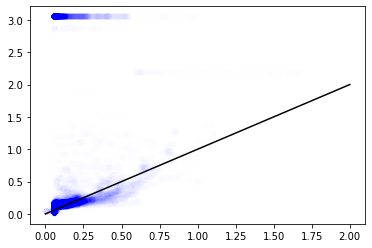

In [28]:
plt.scatter(head_4.values, sensor_4.values, alpha=0.005, c='b')
plt.plot(np.linspace(0, 2), np.linspace(0, 2), c='k')
print(NSE(sensor_4.values, head_4.values))

In [29]:
sensor_list =[bridge_2, bridge_3, bridge_4, bridge_5]
simulation_list =[head_1, head_2, head_3, head_4]
site_names=['Bridge2', 'Bridge3', 'Bridge4', 'Bridge5']

In [30]:
for index, sensor_depth, simulated_depth in zip(range(len(sensor_list)), sensor_list, simulation_list):
    sensor_list[index] = sensor_depth.iloc[sensor_depth.index.get_indexer(simulated_depth.index, method='nearest')]

In [31]:
ransac_results = {}

for site_name, sensor_depth, simulated_depth in zip(site_names, sensor_list, simulation_list):
    inlier_mask, outlier_mask, r2_score_inlier, r2_score,X,y=RANSAC(sensor_depth[site_name].values, simulated_depth.values)
    ransac_results[site_name] = {}
    ransac_results[site_name]['inlier_mask'] = inlier_mask
    ransac_results[site_name]['outlier_mask'] = outlier_mask
    ransac_results[site_name]['r2_inlier'] = r2_score_inlier
    ransac_results[site_name]['r2'] = r2_score
    ransac_results[site_name]['X'] = X
    ransac_results[site_name]['y'] = y

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ransac.py:369: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is e

In [32]:
#head_1.index.freq = None
#head_2.index.freq = None
#head_3.index.freq = None
#head_4.index.freq = None

Text(0.1, 0.5, 'Sensor Water depth(m)')

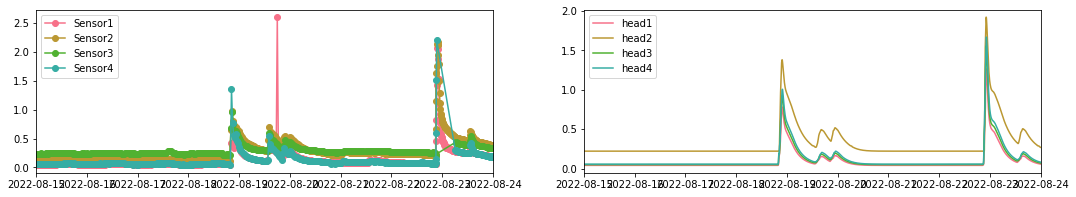

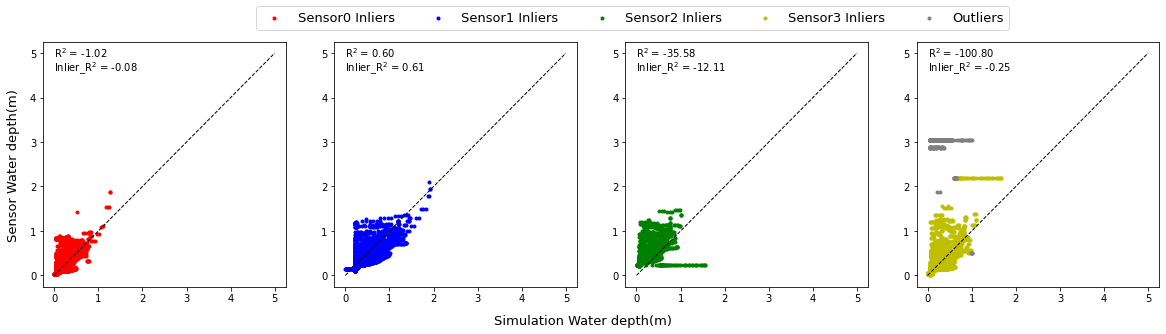

In [33]:
import pandas as pd
import math
from matplotlib import pyplot as plt

start_date='20220815'
end_date='20220824'

fig, axes = plt.subplots(1,2 ,figsize=(18, 3))
a = bridge_2['Bridge2']
a2=a[start_date:end_date]
t_a2 =a[start_date:end_date].index
axes[0].plot(t_a2,a2,'o-', label='Sensor1')

a = bridge_3['Bridge3']
a3=a[start_date:end_date]
t_a3 =a[start_date:end_date].index
axes[0].plot(t_a3,a3,'o-', label='Sensor2')

a = bridge_4['Bridge4']
a4=a[start_date:end_date]
t_a4 =a[start_date:end_date].index
axes[0].plot(t_a4,a4,'o-', label='Sensor3')

a = bridge_5['Bridge5']
a5=a[start_date:end_date]
t_a5 =a[start_date:end_date].index
axes[0].plot(t_a5,a5,'o-', label='Sensor4')
axes[0].legend()

axes[0].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

axes[1].plot(head_1[start_date:end_date],label='head1')
axes[1].plot(head_2[start_date:end_date],label='head2')
axes[1].plot(head_3[start_date:end_date],label='head3')
axes[1].plot(head_4[start_date:end_date],label='head4')
axes[1].set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

plt.legend()



list_mark=['r','b','g','y']
fig, ax = plt.subplots(1, 4,figsize=(20, 4.5))
line_X = np.arange(0,6,1)
line_y_ransac= np.arange(0,6,1)
list_sensor=['sensor2','sensor3','sensor4','sensor5']



for i, site_name in enumerate(site_names):
    inlier_mask=ransac_results[site_name][f'inlier_mask']
    outlier_mask=ransac_results[site_name][f'outlier_mask']
    r2_score_inlier=ransac_results[site_name][f'r2_inlier']
    r2_score=ransac_results[site_name][f'r2']
    X=ransac_results[site_name][f'X']
    y=ransac_results[site_name][f'y']
    
    ax[i].scatter(X[inlier_mask], y[inlier_mask],marker='.', c=list_mark[i],label=f'Sensor{i} Inliers ')
    
    ax[i].plot(line_X, line_y_ransac, 'k--', lw=1)
    ax[i].text(0,4.9,'R$^2$ = %0.2f' % r2_score)
    ax[i].text(0,4.6,'Inlier_R$^2$ = %0.2f' % r2_score_inlier)
    
    
ax[3].scatter(X[outlier_mask], y[outlier_mask],marker='.',c='gray', label='Outliers')
  
# reordering the labels
import matplotlib.ticker as mticker
fig.legend(bbox_to_anchor =(0.8, 1.01), ncol = 8,fontsize=13)



fig.text(0.5, 0.01, 'Simulation Water depth(m)', ha='center',fontsize=13)
fig.text(0.1, 0.5, 'Sensor Water depth(m)', va='center', rotation='vertical',fontsize=13)

#axes[0].set_ylim(0, 0.6)
#axes[1].set_ylim(0, 0.6)

#fig.suptitle('Sharing both axes')